In [1]:
import keras
import matplotlib.pyplot as plt
from IPython.display import clear_output

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.data = []
        self.fig = plt.figure()

    def on_batch_end(self, batch, logs):
        self.data.append(logs["loss"])

    def on_epoch_end(self, epoch, logs):
        self.data.append(logs["loss"])
        clear_output(wait=True)
        plt.plot(self.data)
        plt.show()
        
    def save(self, output_path):
        plt.figure()
        plt.plot(self.data)
        plt.savefig(output_path)
        


In [7]:
import keras 
from keras import layers

def build_model(name, inputs_count, vertex_count):
    model = keras.Sequential(name="FDDA_{}".format(name), 
                             layers=[
        layers.Dense(512, input_dim=inputs_count, activation="tanh"),
        layers.Dense(512, activation="tanh", input_dim=100),
        layers.Dense(vertex_count, activation="linear")
    ])

    adam = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=adam, loss="mse", metrics=["mae"])

    return model

model = build_model("TestModel", 9, 1000)
model.summary()

Model: "FDDA_TestModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 512)               5120      
                                                                 
 dense_34 (Dense)            (None, 512)               262656    
                                                                 
 dense_35 (Dense)            (None, 1000)              513000    
                                                                 
Total params: 780,776
Trainable params: 780,776
Non-trainable params: 0
_________________________________________________________________


In [3]:
from maya import standalone
standalone.initialize()

In [8]:
import sys
for module in ["fdda.model", "fdda.common"]:
    if module in sys.modules:
        del sys.modules[module]

from fdda.model import SubsetModel

import json
import os

RECORDING_DIR = "D:\\M2\\DeepLearning\\Arm\\recording"
MODEL_FILE = "Arm_model.json"

with open(os.path.join(RECORDING_DIR, MODEL_FILE), "r") as model_file:
    model_description = json.load(model_file)   


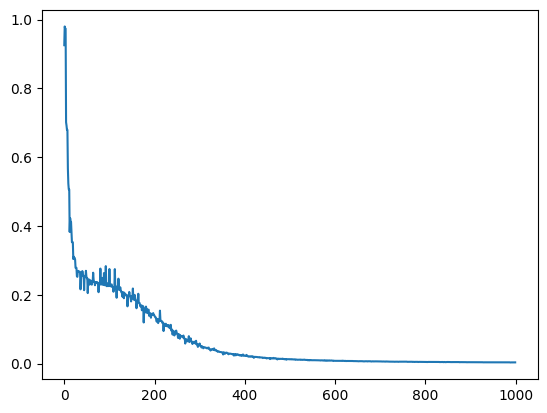

3/3 [==============================] - 0s 89ms/step - loss: 0.0036 - mae: 0.0445 - val_loss: 0.0210 - val_mae: 0.0932


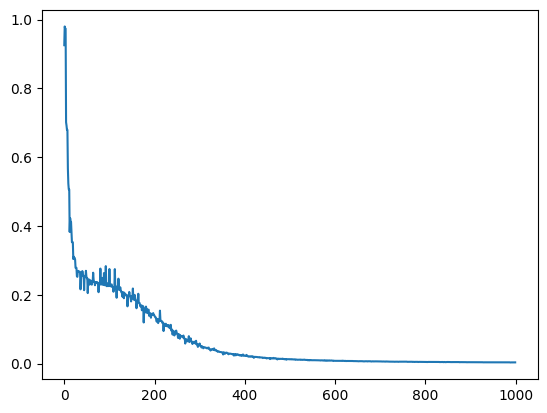

In [11]:
TRAINED_DIR = "D:\\M2\\DeepLearning\\Arm\\trained"

history = LossHistory()
for subset_description in model_description["subsets"]:
    subset_model = SubsetModel.from_description(subset_description, model_description["name"])
    inputs, outputs = subset_model.read_associated_recording(RECORDING_DIR)
    subset_model.train(inputs, outputs, epochs=250, callbacks=[history])
    history.save(os.path.join(TRAINED_DIR, subset_model.subset.main_joint + ".png"))
    
    subset_model.save(TRAINED_DIR)